# Discretized Hamiltonian

We compute here the eigenvalues $\varepsilon_n$ and eigenfunctions $\psi_n(z)$ of an MTI slab which is infinitely extended along the in-plane directions $x$ and $y$ and which has a finite thickness $d$ along the out-of-plane direction $z$.
The three-dimensional MTI Hamiltonian can be decomposed as 
$$
    h_{MTI} = A \partial^2_z + B \partial_z + C \,, 
$$
where the derivative part is 
$$
	A = 
	\begin{bmatrix}
		(B_1-D_1) & 0 & 0 & 0 \\[5pt]
		%
		0 & (B_1-D_1) & 0 & 0 \\[5pt]
		%
		0 & 0 & -(B_1+D_1) & 0 \\[5pt]
		%
		0 & 0 & 0 & -(B_1+D_1)
	\end{bmatrix} \,,
    \qquad
	B = 
	\begin{bmatrix}
		0 & 0 & -i A_1 & 0 \\[5pt]
		%
		0 & 0 & 0 & i A_1  \\[5pt]
		%
		-i A_1 & 0 & 0 & 0 \\[5pt]
		%
		0 & i A_1 & 0 & 0 
	\end{bmatrix} \,,     
$$
and the constant term is given by
$$
    C =  
	\begin{bmatrix}
		\varepsilon_0 + \mu_0 + \Lambda & 0 & 0 & A_2 k_-\\[5pt]
		%
		0 & \varepsilon_0 + \mu_0 - \Lambda & A_2 k_+ & 0 \\[5pt]
		%
		0 & A_2 k_- & \varepsilon_0 - \mu_0 + \Lambda & 0 \\[5pt]
		%
		A_2 k_+ & 0 & 0 & \varepsilon_0 - \mu_0 - \Lambda \\[5pt]
	\end{bmatrix} \,.
$$
In the basis of states $\{ \ket{+,\uparrow}, \ket{+,\downarrow}, \ket{-,\uparrow}, \ket{-,\downarrow} \}$, the three matrices $A,B$ and $C$ can be expressed as
$$
\begin{gathered}
    A = B_1 \lambda_z \sigma_0 - D_1 \lambda_0 \sigma_0 \,, \\[5pt]
    %
    B = -i A_1 \lambda_x \sigma_z \,, \\[5pt]
        %
    C = \epsilon_0 \lambda_0 \sigma_0 + \Lambda \lambda_0 \sigma_z + A_2 \left( k_x \lambda_x  \sigma_x + k_y \lambda_x  \sigma_y \right) + \mu_0 \lambda_z \sigma_0 \,,
\end{gathered}
$$
where $\lambda_{x,y,z}$ and $\sigma_{x,y,z}$ are Pauli matrices acting in the parity and spin subspaces, respectively.

In [1]:
import numpy as np

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

# Set of Pauli matrices for spin
sigma0 = np.array([[1, 0], [0, 1]])
sigmaX = np.array([[0, 1], [1, 0]])
sigmaY = np.array([[0, -1j], [1j, 0]])
sigmaZ = np.array([[1, 0], [0, -1]])


# Set of Pauli matrices for pseudo-spin
lambda0 = np.array([[1, 0], [0, 1]])
lambdaX = np.array([[0, 1], [1, 0]])
lambdaY = np.array([[0, -1j], [1j, 0]])
lambdaZ = np.array([[1, 0], [0, -1]])


# Identity matrix
Id = np.kron(lambda0,sigma0)

# Function defining the Matrices A,B,C
def ABCmat(kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    k = np.sqrt(kx**2+ky**2); e0 = C + D2*k**2; m0 = M - B2*k**2

    #matrix A
    Amat = B1*np.kron(lambdaZ, sigma0) - D1*np.kron(lambda0, sigma0)

    # matrix B
    Bmat = -1j*A1*np.kron(lambdaX, sigmaZ)

    # matrix C
    Cmat = e0*np.kron(lambda0, sigma0) + L*np.kron(lambda0, sigmaZ) + A2*(kx*np.kron(lambdaX, sigmaX) + ky*np.kron(lambdaX, sigmaY)) + m0*np.kron(lambdaZ, sigma0)

    return [Amat,Bmat,Cmat]


# Function building the 3D MTI Hamiltonian from A,B,C
def hMTI(kx, ky, kz, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # build A,B,C matrices
    [Amat, Bmat, Cmat] = ABCmat(kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    return -np.power(kz,2)*Amat + 1j*kz*Bmat + Cmat

Using the *finite difference approximations*, the spatial derivatives of the wavefunction $\psi \equiv \psi(z)$ can be approximated in the following way

- $ \partial_z f(z) \approx \bigl\lbrack f(z + \Delta z) − f(z − \Delta z) \bigr\rbrack / 2 \Delta z $, 

- $ \partial^2_z f(z) \approx \bigl\lbrack f(z + \Delta z) - 2f(z) + f(z − \Delta z) \bigr\rbrack / \Delta z^2 $,	

and the energy eigenvalue problem $h_{MTI} \psi = E \psi$ becomes
$$
\begin{split}
    h_{MTI} \psi(z) &= \Bigl\lbrack A \partial^2_z + B \partial_z + C \Bigr\rbrack \psi(z) = \\[5pt]
    %
    &= 
    A \frac{1}{\Delta z^2} 
    \Bigl\lbrack \psi(z + \Delta z) - 2\psi(z) + \psi(z − \Delta z) \Bigr\rbrack 
    +
    B \frac{1}{2 \Delta z}
    \Bigl\lbrack \psi(z + \Delta z) - \psi(z − \Delta z) \Bigr\rbrack 
    +
    C \psi(z) = \\[5pt]
    %
    &=
    \Bigl\lbrack \frac{A}{\Delta z^2} + \frac{B}{2 \Delta z} \Bigr\rbrack
    \psi(z + \Delta z)
    +
    \Bigl\lbrack C - \frac{2 A}{\Delta z^2} \Bigr\rbrack
    \psi(z)
    +
    \Bigl\lbrack \frac{A}{\Delta z^2} - \frac{B}{2 \Delta z} \Bigr\rbrack
    \psi(z - \Delta z) 
    =
    E \psi(z) \,.
\end{split}
$$
In the previous equation, we can recognize a tight-binding problem with on-site energy $h_0$ and hopping terms  $h_\pm$ given by 
$$
    h_0 = C - \frac{2 A}{\Delta z^2} \,,
    \qquad
    h_\pm = \frac{A}{\Delta z^2} \pm \frac{B}{2 \Delta z} \,.
$$ 
Given $N+1$ lattice points with spacing $\Delta z$ along the out-of-plane direction $z$ and assuming open boundary conditions at the extremities such that
$$
\begin{equation}
    h_- \psi (0) = 0 \,, \qquad h_+ \, \psi (N \Delta z) = 0 \,,
\end{equation}
$$
we can thus write the following set of equations for the confined based on the previous approximation
$$
\begin{equation}
    \begin{cases}
        h_0 \psi(0) +  h_+ \psi (\Delta y) = E  \psi(0) \,, \\[10pt]
        %
        h_- \psi((n-1)\Delta y) + h_0 \psi (n \Delta y) +  h_+ \psi ((n+1)\Delta y) = E \psi (n \Delta y) \,, \\[10pt]
        %
        h_- \psi ((N-1)\Delta y) + h_0 \psi (N \Delta y)  = E  \psi (N\Delta y) \,.    
    \end{cases}
\end{equation}
$$
Defining a discretized wavefunction on the lattice $$
    \Psi = 
    \begin{bmatrix}
    \psi(0) & \psi(\Delta z) & \dots & \psi(N \Delta z) 
    \end{bmatrix}^T \,,
$$
the energy eigenvalue problem can finally be rewritten as $H \Psi = E \Psi$ where 
$$
    H =
    \begin{bmatrix}
    h_0 & h_+ & 0 & & \dots & 0 \\[5pt]
    %
    h_- & h_0 & h_+ & 0 & \dots & 0 \\[5pt]
    %
    \vdots & & & & & \vdots \\[5pt]
    %
    0 & & & h_- & h_0 & h_+ \\[5pt]
    %
    0 & & & & h_- & h_0
    \end{bmatrix} \,.
$$
To ensure real energy eigenvalues the matrix $H$ must be hermitian: such conditions is satisfied if 
$$
    h_+^\dagger = 
    \frac{A^\dagger}{\Delta z^2} + \frac{B^\dagger}{2 \Delta z} 
    =
    \frac{A}{\Delta z^2} - \frac{B}{2 \Delta z} = h_-  \,,
$$
which means that $A = A^\dagger$ and $B^\dagger = -B$.
It's worth noting that these conditions are always satisfied:
$$
\begin{gathered}
    A^\dagger = B_1^\star \lambda_z \sigma_0 - D_1^\star \lambda_0 \sigma_0 = B_1 \lambda_z \sigma_0 - D_1 \lambda_0 \sigma_0 = A \,, \\[5pt]
    %
    B^\dagger = i A_1^\star \lambda_x \sigma_z = i A_1 \lambda_x \sigma_z = - B \,,
\end{gathered}
$$
which are always satisfied for $A_1, B_1$ and $D_1$ real.

In [16]:
from scipy.linalg import ishermitian
from scipy.sparse import coo_matrix, bmat
from scipy.sparse.linalg import eigs, eigsh


# Build the tigh-binding hamiltonian (Nlat=lattice points, dZ=lattice spacing)
def TBham(Nlat, dZ, kx, ky, L, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # build A,B,C matrices
    [Amat, Bmat, Cmat] = ABCmat(kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    # on-site energy
    onsite = Cmat - 2./np.power(dZ,2)*Amat;

    # hopping energy
    hopping_plus = 1./np.power(dZ,2)*Amat + 1./(2.*np.power(dZ,2))*Bmat

    # hopping minus
    hopping_minus = np.conjugate(np.transpose(hopping_plus))

    # define a zero tight-binding matrix
    TBmat = [ [None for _ in range(Nlat) ] for _ in range(Nlat)]
		
	# populate the tight-binding matrix
    for i in range(Nlat):
		
        # onsite diagonal energy 
        TBmat[i][i] = onsite
        # hopping energy (n+1)
        if i+1 < Nlat: TBmat[i][i+1] = hopping_plus
        # hopping energy (n-1)
        if i-1 > -1: TBmat[i][i-1] = hopping_minus

    return bmat(TBmat)


# Compute energy and wavefunctions in the MTI slab
def eigensates(Nlat, dZ, kx, ky, L, Neig=10, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6):

    # build the tight-binding matrix
    tb = TBham(Nlat, dZ, kx, ky, L, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2)

    return eigsh(tb, k=Neig, sigma=0)


# lattice (Nlat=lattice points, d=thickness, dZ=lattice spacing)
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
lattice = np.linspace(0., d, num=Nlat)

# solve the tight-binding problem
egval, egvec = eigensates(Nlat=Nlat, dZ=dZ, kx=0., ky=0., L=0., Neig=12)

# number of eigenvlaues
n = len(egval)

spinors = []
# loop over eigenvalues
for iegv in range(n):
 
    # wavefunction on the lattice
    psi = egvec[:, iegv]

    # spinors corresponding to each lattice points
    spinors.append([ psi[4*ilat:4*ilat+4] for ilat in range(Nlat) ])

spinors = np.array(spinors)

## <font> **Eigenstates and Eigenenergies** </font> 

### <font> Full Spinors </font> 


We plot here the probability density $|\psi_n(z)|^2$, where the wavefunction $\psi_n(z)$ is given by the 4-components spinor
$$
\psi_n(z) = 
\begin{pmatrix}
    \psi_{n, \, \uparrow +} (z) &
    \psi_{n, \, \downarrow +} (z) &
    \psi_{n, \, \uparrow -} (z) &
    \psi_{n, \, \downarrow -} (z) 
\end{pmatrix}^T \,,
$$
where $n$ is a discrete quantum number which label the discrete states in the finite system..
The wavefunction is indeed obtained assuming an MTI slab with thickness $d = N_{lat} \, \Delta z$, where $N_{lat}$ is the number of lattice points along the $z$ direction and $\Delta z$ is the spacing between them.
In the following, the wavefunctions are normalized such that 
$$
    \int_0^d dz \, |\psi_n(z)|^2 = 1 \,.
$$

#### <font color='green'> **Eigenvalues** </font> 

Energy eigenvalues: [ 0.0272764   0.0272764   0.03195007  0.03195007 -0.34172142 -0.34172142
  0.3373128   0.3373128  -0.46049368 -0.46049368  0.47113893  0.47113893]



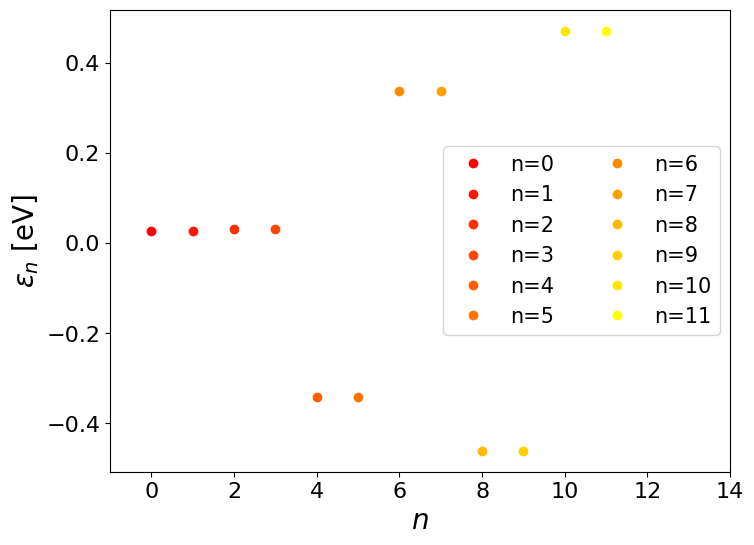

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# colors
cmap = plt.get_cmap('autumn', n)
# figure
fig, ax = plt.subplots(1,1, figsize=(8, 6))

# energies 
print('Energy eigenvalues: ' + str(egval[0:n])); print()

# loop over eigenvalues
for iegv in range(n):
    ax.plot(iegv, egval[iegv], 'o', label='n=' + str(iegv), c=cmap(iegv));

ax.legend(fontsize=15, ncol=2, loc='center right')
ax.set_xlim(-1, n+2)
ax.set_xlabel('$n$', fontsize = 20)
ax.set_ylabel('$\epsilon_n$ [eV]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

#### <font color='green'> **Probability Density** </font> 

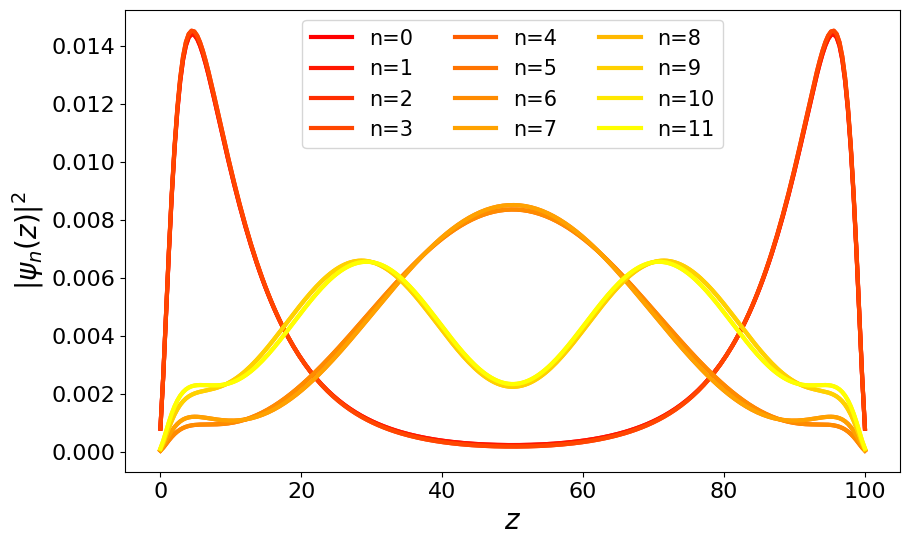

In [17]:
# figure
fig, ax = plt.subplots(1,1, figsize=(10, 6))

# loop over eigenvalues
for iegv in range(n):
    
    # probability density for each lattice point
    probdens = np.array([np.dot(np.conjugate(s), s) for s in spinors[iegv]]).real

    # plot probability density
    ax.plot(lattice, probdens, label='n=' + str(iegv), lw=3, c=cmap(iegv))

    # normalization
    #print(np.trapz(probdens))

ax.legend(fontsize=15, loc='upper center', ncol=3)
ax.set_xlabel('$z$', fontsize = 20)
ax.set_ylabel('$|\psi_n(z)|^2$', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

### <font> Components </font> 

We plot here the probability density $|\psi_{n, \, \sigma\lambda} (z)|^2$, for each component of the wavefunction $\psi_{n}(z)$ with spin $\sigma=\uparrow,\downarrow$ and parity $\lambda=\pm$.

#### <font color='green'> **Eigenvalues** </font> 

Energy eigenvalues: [0.0272764  0.0272764  0.03195007 0.03195007]



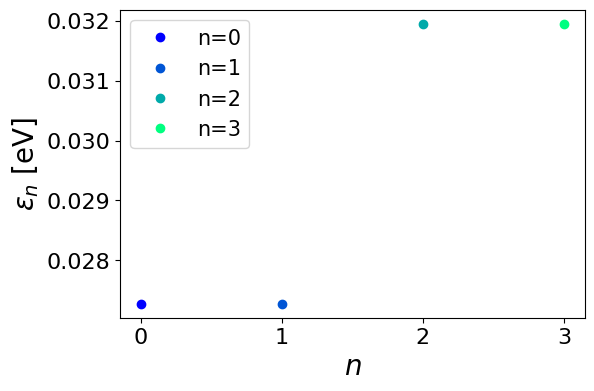

In [19]:
# number of eigenvlaues
n = 4
# colors
cmap = plt.get_cmap('winter', n)

# figure
fig, ax = plt.subplots(1,1, figsize=(6,4))

# energies 
print('Energy eigenvalues: ' + str(egval[0:n])); print()

# loop over eigenvalues
for iegv in range(n):
    ax.plot(iegv, egval[iegv], 'o', label='n=' + str(iegv), c=cmap(iegv))

ax.legend(fontsize=15)
#ax.set_xlim(-0.5, 3.5)
ax.set_xlabel('$n$', fontsize = 20)
ax.set_ylabel('$\epsilon_n$ [eV]', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16);

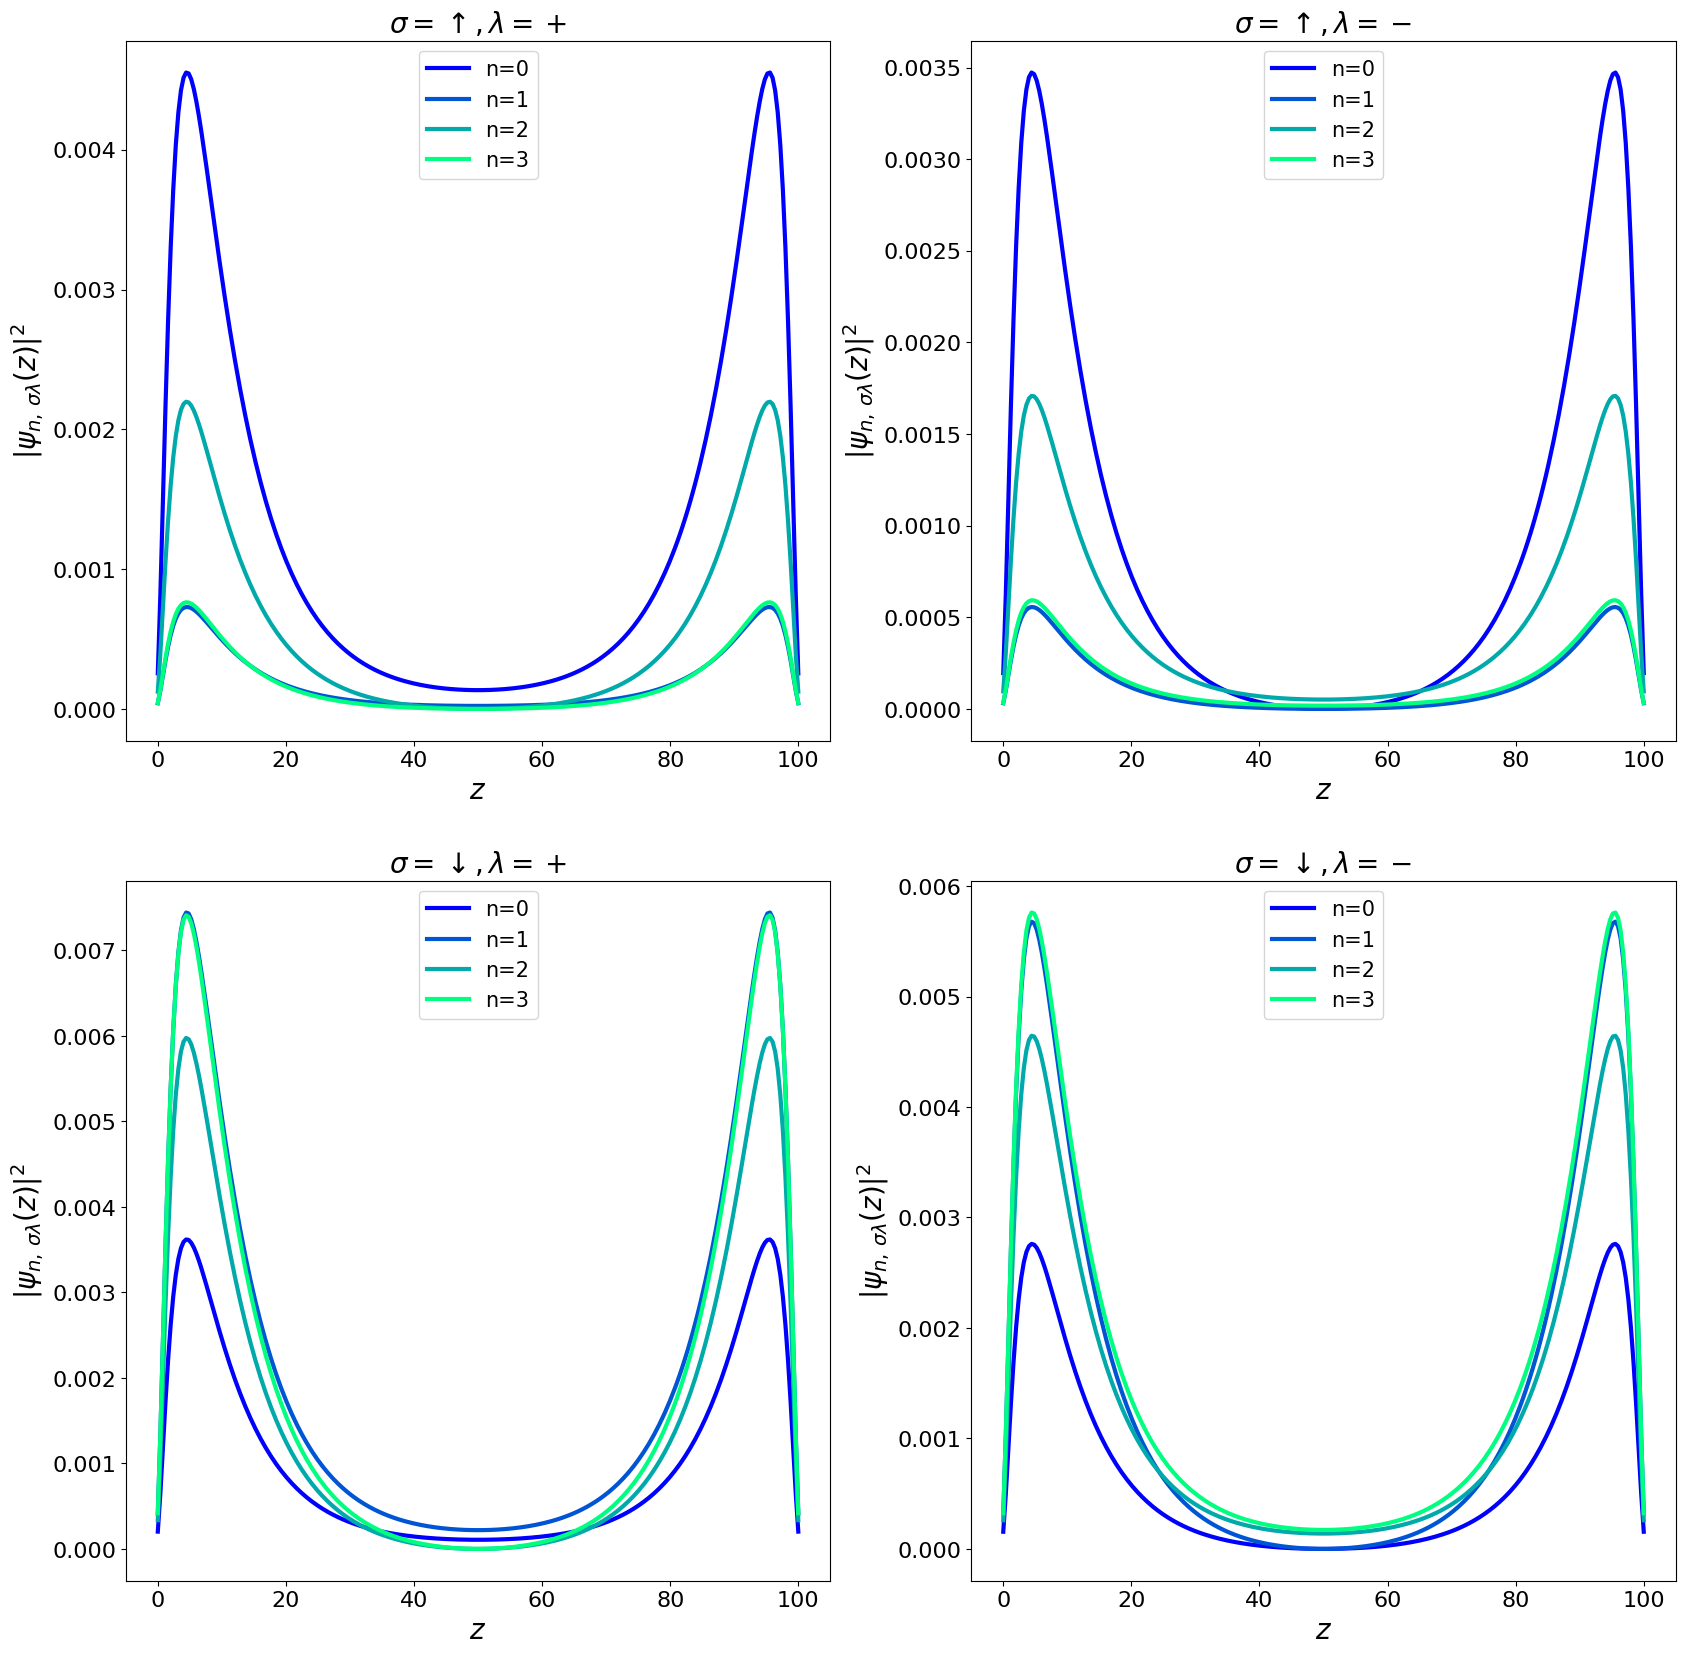

In [22]:
# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# loop over eigenvalues
for iegv in range(n):

    # probability density 
    probdens = np.array([[ s[icomp]*np.conjugate(s[icomp]) for icomp in range(4)] for s in spinors[iegv]]).real
    
    # loop over wavefunctions components
    for icomp in range(4):

        # spin up components
        if icomp==0: iPic = 0; jPic = 0; axs[iPic][jPic].set_title('$\sigma=\\uparrow, \lambda=+$', fontsize = 20)
        if icomp==2: iPic = 0; jPic = 1; axs[iPic][jPic].set_title('$\sigma=\\uparrow, \lambda=-$', fontsize = 20)
        # spin down components  
        if icomp==1: iPic = 1; jPic = 0; axs[iPic][jPic].set_title('$\sigma=\downarrow, \lambda=+$', fontsize = 20)
        if icomp==3: iPic = 1; jPic = 1; axs[iPic][jPic].set_title('$\sigma=\downarrow, \lambda=-$', fontsize = 20)
        
        axs[iPic][jPic].plot(lattice, probdens[:,icomp], label='n=' + str(iegv), lw=3, c=cmap(iegv))
        
        # normalization
        #print(np.trapz(probdens[:,icomp]))

        axs[iPic][jPic].legend(fontsize=15)
        axs[iPic][jPic].set_xlabel('$z$', fontsize = 20)
        axs[iPic][jPic].set_ylabel('$|\psi_{n, \, \sigma \lambda}(z)|^2$', fontsize = 20)
        axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=16);

## <font> **Green's Function** </font> 

$\newcommand{\T}{\hat{T}_t \,}$

The goal here is to compute the real-time Green's function $\mathcal{G}^{(0)}_{MTI}$ using the wavefunctions $\psi_{n, \, \sigma\lambda}$ obtained by discretizing the 3D MTI Hamiltonian $h_{MTI}$ on a finite lattice along the $z$ direction.
In the MTI slab, with a finite thickness along $z$ and translational invariance along $x$ and $y$, the real-time Green's function is given by
$$
	\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \left\langle
	\T \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
	\right\rangle_0 \,,
$$
where $\hat{\psi}^\dagger_{\sigma \lambda}(zt)$ $(\hat{\psi}_{\sigma \lambda}(zt))$ creates (annihilates) an electron with spin $\sigma$ and parity $\lambda$ at position $z$ and time $t$, and $\langle \dots \rangle$ indicates that the average is on the unperturbed ground state.
For the sake of clarity, we omitted the labels for the in-plane wavenumbers $k_x$ and $k_y$.
Writing explicitly the time-evolution in the Heisenberg picture, the field operators can be expanded in terms of the wavefunctions $\psi_{n, \, \sigma\lambda}$ as
$$
    \hat{\psi}_{\sigma \lambda}(zt) = 
    \sum_{n=0}^{+\infty} e^{-i \epsilon_n t} \psi_{n, \, \sigma\lambda}(z) \hat{c}_{n, \, \sigma\lambda} \,,
    \qquad
    \hat{\psi}^\dagger_{\sigma \lambda}(zt) = 
    \sum_{n=0}^{+\infty} e^{i \epsilon_n t} \psi_{n, \, \sigma\lambda}^\star(z) \hat{c}^\dagger_{n, \, \sigma\lambda} \,,
$$
where $\hat{c}^\dagger_{n, \, \sigma\lambda}$ $(\hat{c}_{n, \, \sigma\lambda})$ are the creation (annihilation) operators for an electron in the quantum state labelled by $\{n,\sigma,\lambda \}$.
Making explicit the action of the time-ordering operator, the Green's function takes the following form
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
	-i \theta(t-t') \left\langle  \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
     +
     i \theta(t'-t) \left\langle \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \hat{\psi}_{\sigma \lambda}(zt) \right\rangle_0 \,.
$$
The first term in the previous equation can be rewritten as
$$
\begin{split}
    \left\langle \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't') \right\rangle_0
    &=
    \sum_{n m} 
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right) } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle \hat{c}_{n, \, \sigma\lambda} \hat{c}^\dagger_{m, \, \sigma'\lambda'} \right\rangle_0 = \\[5pt]
    %%%
    &=
    \sum_{n m} 
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right) } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        \delta_{nm} \delta_{\sigma\sigma'} \delta_{\lambda\lambda'} -
        \hat{c}^\dagger_{m, \, \sigma'\lambda'} \hat{c}_{n, \, \sigma\lambda} 
    \right\rangle_0 = \\[5pt]
    %%%
    &=
    \sum_{n m} \delta_{nm} \delta_{\sigma\sigma'} \delta_{\lambda\lambda'}
    e^{-i \left( \epsilon_n t - \epsilon_{m} t' \right) } 
    \psi_{n, \, \sigma\lambda}(z) \psi_{m, \, \sigma'\lambda'}^\star(z') 
    \left\langle 
        1 -
        \hat{c}^\dagger_{m, \, \sigma'\lambda'} \hat{c}_{n, \, \sigma\lambda} 
    \right\rangle_0 = \\[5pt]
\end{split}
$$
